In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import plotly.offline as pyo
#pyo.init_notebook_mode()

import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier 

In [27]:
df=pd.read_csv('Raw Dataset/train.csv')


In [28]:
df_for_age=df[['Age','Survived']]
df_for_age

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
886,27.0,0
887,19.0,1
888,NaN,0
889,26.0,1


In [29]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
categorical_features=[feature for feature in df.columns  if df[feature].dtypes=="O"]
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [33]:
df[categorical_features]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [34]:
df[categorical_features].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moutal, Mr. Rahamin Haim",male,1601,B96 B98,S
freq,1,577,7,4,644


In [35]:

df.shape

(891, 12)

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
df_for_age=df[['Age','Survived']]

In [38]:
df.dropna(subset=['Embarked'],inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
class main():
    def __init__(self,data,arr,filename):
        self.data=data
        self.arr=arr
        self.filename=filename
    def t1(self):
        no_of_passanger=[]
        survived=[]
        sort=sorted(self.arr)
        for i in sort:
            no_of_passanger.append(len(self.data[self.data.iloc[:,0]==i]))
            survived.append(self.data[self.data.iloc[:,0]==i]['Survived'].sum())
        table=pd.DataFrame({'code/number':sort,'No.of passanger':no_of_passanger,'Survived':survived})
        table['Dead']=table['No.of passanger']-table['Survived']
        table['Survived/Dead']=round(table['Survived']/table['Dead']*100,2)
        table['Survival percentage']=round(table['Survived']*100/table['No.of passanger'],2)
        table['Dead percentage']=round(table['Dead']*100/table['No.of passanger'],2)
        #cab_table
        table.to_csv(f'Dataset/{self.filename}_code_survived.csv')
        plot=px.bar(data_frame=table, x = "code/number", y = ["Survived/Dead", "Survival percentage",'Dead percentage'], barmode="group", title= f'{self.filename}_code_survived')
        # Plot is available in the plot section
        return table,px.bar(data_frame=table, x = "code/number", y = ["Survived/Dead", "Survival percentage",'Dead percentage'], barmode="group", title= f'{self.filename}_code_survived')



# Cabin

In [41]:
cab,survived=[],[]
for i in np.where(df['Cabin'].isnull()==False)[0]:
    temp=df['Cabin'].iloc[i].split(' ')
    for j in temp:
        cab.append(j[0])
        survived.append(df['Survived'].iloc[i])

In [42]:
#cab

In [43]:
cabin_df=pd.DataFrame({'Cabin_code':cab,'Survived' :survived})
#cabin_df.iloc[:,0]

In [44]:
cabin_df

,Cabin_code,Survived
0,C,1
1,C,1
2,E,0
3,G,1
4,C,1
...,...,...
231,B,0
232,B,0
233,C,1
234,B,1


In [45]:
cabin_df.Cabin_code.value_counts()

C    71
B    62
D    34
E    33
A    15
F    13
G     7
T     1
Name: Cabin_code, dtype: int64

In [46]:
arr=cabin_df.Cabin_code.unique()
arr

array(['C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [47]:
cabin=main(cabin_df,arr,'Cabin')

In [48]:
table,plot=cabin.t1()

In [49]:
table

,code/number,No.of passanger,Survived,Dead,Survived/Dead,Survival percentage,Dead percentage
0,A,15,7,8,87.50,46.67,53.33
1,B,62,46,16,287.50,74.19,25.81
2,C,71,41,30,136.67,57.75,42.25
3,D,34,26,8,325.00,76.47,23.53
4,E,33,25,8,312.50,75.76,24.24
5,F,13,8,5,160.00,61.54,38.46
6,G,7,2,5,40.00,28.57,71.43
7,T,1,0,1,0.00,0.00,100.00


In [50]:
plot

# Embarked

In [827]:
embarked,survived=[],[]
for i in np.where(df['Embarked'].isnull()==False)[0]:
    temp=df['Embarked'].iloc[i]
    #for j in temp:
    embarked.append(df['Embarked'].iloc[i])
    survived.append(df['Survived'].iloc[i])

In [828]:
embarked_df=pd.DataFrame({'Embarked':embarked,'Survived' :survived})
#embarked_df.iloc[:,0]

In [829]:
arr=embarked_df['Embarked'].unique()
#arr

In [830]:
emb_code=[i for i in sorted(arr)]
#cab_code


In [831]:
embarked=main(embarked_df,arr,'Embarked')

In [832]:
table,plot=embarked.t1()

In [833]:
table

,code/number,No.of passanger,Survived,Dead,Survived/Dead,Survival percentage,Dead percentage
0,C,168,93,75,124.00,55.36,44.64
1,Q,77,30,47,63.83,38.96,61.04
2,S,644,217,427,50.82,33.70,66.30


In [834]:
plot

# Pclass

In [835]:
pclass,survived=[],[]
for i in range(len(df)):
    pclass.append(df['Pclass'].iloc[i])
    survived.append(df['Survived'].iloc[i])
pclass_df=pd.DataFrame({'pclass_code':pclass,'Survived' :survived})
arr=pclass_df.pclass_code.unique()


In [836]:
pclass=main(pclass_df,arr,"Pclass")

In [837]:
table,plot=pclass.t1()

In [838]:
table

,code/number,No.of passanger,Survived,Dead,Survived/Dead,Survival percentage,Dead percentage
0,1,214,134,80,167.50,62.62,37.38
1,2,184,87,97,89.69,47.28,52.72
2,3,491,119,372,31.99,24.24,75.76


In [839]:
plot

# Sex

In [840]:
sex,survived=[],[]
for i in range(len(df)):
    sex.append(df['Sex'].iloc[i])
    survived.append(df['Survived'].iloc[i])
sex_df=pd.DataFrame({'sex_code':sex,'Survived' :survived})
arr=sex_df.sex_code.unique()
sex=main(sex_df,arr,"Sex")
table,plot=sex.t1()

In [841]:
table

,code/number,No.of passanger,Survived,Dead,Survived/Dead,Survival percentage,Dead percentage
0,female,312,231,81,285.19,74.04,25.96
1,male,577,109,468,23.29,18.89,81.11


In [842]:
plot

# Sibling

In [843]:
sibsp,survived=[],[]
for i in range(len(df)):
    sibsp.append(df['SibSp'].iloc[i])
    survived.append(df['Survived'].iloc[i])
sibsp_df=pd.DataFrame({'sibsp_code':sibsp,'Survived' :survived})
arr=sibsp_df.sibsp_code.unique()
sibsp=main(sibsp_df,arr,"SibSp")
table,plot=sibsp.t1()

In [844]:
table

,code/number,No.of passanger,Survived,Dead,Survived/Dead,Survival percentage,Dead percentage
0,0,606,208,398,52.26,34.32,65.68
1,1,209,112,97,115.46,53.59,46.41
2,2,28,13,15,86.67,46.43,53.57
3,3,16,4,12,33.33,25.00,75.00
4,4,18,3,15,20.00,16.67,83.33
5,5,5,0,5,0.00,0.00,100.00
6,8,7,0,7,0.00,0.00,100.00


In [845]:
plot

# Parch

In [846]:
parch,survived=[],[]
for i in range(len(df)):
    parch.append(df['Parch'].iloc[i])
    survived.append(df['Survived'].iloc[i])
parch_df=pd.DataFrame({'parch_code':parch,'Survived' :survived})
arr=parch_df.parch_code.unique()
parch=main(parch_df,arr,"Parch")
table,plot=parch.t1()

In [847]:
table

,code/number,No.of passanger,Survived,Dead,Survived/Dead,Survival percentage,Dead percentage
0,0,676,231,445,51.91,34.17,65.83
1,1,118,65,53,122.64,55.08,44.92
2,2,80,40,40,100.00,50.00,50.00
3,3,5,3,2,150.00,60.00,40.00
4,4,4,0,4,0.00,0.00,100.00
5,5,5,1,4,25.00,20.00,80.00
6,6,1,0,1,0.00,0.00,100.00


In [848]:
plot

# Age

In [849]:
age=[]
survived=[]
for i in np.where(df_for_age['Age'].isnull()==False)[0]:
    a=df_for_age['Age'][i]
    b=int(a)  
    age.append(b)
    survived.append(df_for_age['Survived'][i])

In [850]:
df1=pd.DataFrame({'Age':age,'Survived':survived})
df1.head(50)
len(df1)

714

In [851]:
df1['Age_group']=0
for i in range(len(df1)):
    if df1['Age'][i]<26:
        df1['Age_group'][i]='age_below_26'
        
    elif df1['Age'][i]<61:
        df1['Age_group'][i]='age_below_61'
    else:
        df1['Age'][i]<81
        df1['Age_group'][i]='age_below_81'
        

<ipython-input-851-ebb12a3789d9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-851-ebb12a3789d9>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-851-ebb12a3789d9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [852]:
df1

,Age,Survived,Age_group
0,22,0,age_below_26
1,38,1,age_below_61
2,26,1,age_below_61
3,35,1,age_below_61
4,35,0,age_below_61
...,...,...,...
709,39,0,age_below_61
710,27,0,age_below_61
711,19,1,age_below_26
712,26,1,age_below_61


In [853]:
age_df=df1[['Age_group','Survived']]
age_df

,Age_group,Survived
0,age_below_26,0
1,age_below_61,1
2,age_below_61,1
3,age_below_61,1
4,age_below_61,0
...,...,...
709,age_below_61,0
710,age_below_61,0
711,age_below_26,1
712,age_below_61,1


In [854]:
arr=age_df.Age_group.unique()
arr

array(['age_below_26', 'age_below_61', 'age_below_81'], dtype=object)

In [855]:
age=main(age_df,arr,'Age')

In [856]:
table,plot=age.t1()

In [857]:
table

,code/number,No.of passanger,Survived,Dead,Survived/Dead,Survival percentage,Dead percentage
0,age_below_26,301,124,177,70.06,41.20,58.80
1,age_below_61,391,161,230,70.00,41.18,58.82
2,age_below_81,22,5,17,29.41,22.73,77.27


In [858]:
plot

In [859]:
df.Age.isnull().sum()

177

In [860]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [861]:
df.Age.isnull().sum()

0

<AxesSubplot:xlabel='Age', ylabel='Survived'>

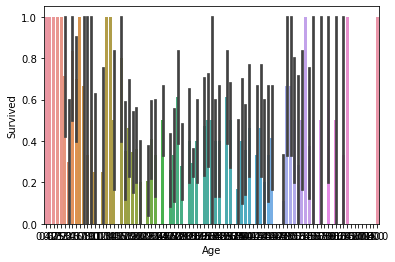

In [862]:
sns.barplot(x='Age',y='Survived',data=df)

# Filling NA values in Cabin

In [863]:
cab = []
survived = []
pclass = []
for i in np.where(df["Cabin"].isnull() == False)[0]:
    temp = df["Cabin"].iloc[i].split(" ")
    for j in temp:
        cab.append(j[0])
        survived.append(df["Survived"].iloc[i])
        pclass.append(df["Pclass"].iloc[i])

In [864]:
cab_df = pd.DataFrame({"Cabin_code":cab, "Survived":survived,"Pclass":pclass})
cab_df

,Cabin_code,Survived,Pclass
0,C,1,1
1,C,1,1
2,E,0,1
3,G,1,3
4,C,1,1
...,...,...,...
231,B,0,1
232,B,0,1
233,C,1,1
234,B,1,1


In [865]:
a=cab_df.Cabin_code.unique()

In [866]:
sum(cab_df[cab_df["Cabin_code"] == "A"]["Pclass"] == 2)

0

In [867]:
cabin=[i for i in sorted(a)]
cabin

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [868]:
upper = []
middle = []
lower = []
for i in cabin:
    upper.append(sum(cab_df[cab_df["Cabin_code"] == i]["Pclass"] == 1))
    middle.append(sum(cab_df[cab_df["Cabin_code"] == i]["Pclass"] == 2))
    lower.append(sum(cab_df[cab_df["Cabin_code"] == i]["Pclass"] == 3))

In [869]:
upper

[15, 62, 71, 30, 25, 0, 0, 1]

In [870]:
lower

[0, 0, 0, 0, 4, 5, 7, 0]

In [871]:
middle

[0, 0, 0, 4, 4, 8, 0, 0]

In [872]:
cab_class_relation = pd.DataFrame({"Cabin_code":cabin, "Upper":upper, "Middle":middle, "Lower":lower})
cab_class_relation

,Cabin_code,Upper,Middle,Lower
0,A,15,0,0
1,B,62,0,0
2,C,71,0,0
3,D,30,4,0
4,E,25,4,4
5,F,0,8,5
6,G,0,0,7
7,T,1,0,0


In [873]:
cab_class_relation["Upper Percentage"] = round(cab_class_relation["Upper"]/sum(cab_class_relation["Upper"])*100,2) 

In [874]:
cab_class_relation["Middle Percentage"] = round(cab_class_relation["Middle"]/sum(cab_class_relation["Middle"])*100,2) 

In [875]:
cab_class_relation["Lower Percentage"] = round(cab_class_relation["Lower"]/sum(cab_class_relation["Lower"])*100,2) 



In [876]:
cab_class_relation

,Cabin_code,Upper,Middle,Lower,Upper Percentage,Middle Percentage,Lower Percentage
0,A,15,0,0,7.35,0.0,0.00
1,B,62,0,0,30.39,0.0,0.00
2,C,71,0,0,34.80,0.0,0.00
3,D,30,4,0,14.71,25.0,0.00
4,E,25,4,4,12.25,25.0,25.00
5,F,0,8,5,0.00,50.0,31.25
6,G,0,0,7,0.00,0.0,43.75
7,T,1,0,0,0.49,0.0,0.00


In [877]:
cab_class_relation.to_csv('Dataset/cab_class_relation.csv')

In [878]:
px.bar(cab_class_relation, x = "Cabin_code", y = ["Upper Percentage", "Middle Percentage", "Lower Percentage"], barmode = "group" ,title='pclass_cabin_relation')


In [879]:
upper = ["C", "B", "D", "A", "T"]
middle = ["F", "E","D"]
lower = ["G", "F", "E"]

In [880]:
for i in range(len(df)):
    if(df["Cabin"].isnull().iloc[i]):
        if(df["Pclass"].iloc[i] == 1):
            df["Cabin"].iloc[i] = upper[np.random.randint(len(upper))]
        elif(df["Pclass"].iloc[i] == 2):
            df["Cabin"].iloc[i] = middle[np.random.randint(len(middle))]
        elif(df["Pclass"].iloc[i] == 3):
            df["Cabin"].iloc[i] = lower[np.random.randint(len(lower))]
        else:
            print("this is else statement")
            break
    else:
        temp = df["Cabin"].iloc[i].split(" ")
        df["Cabin"].iloc[i] = temp[0][0]

C:\Users\Bhaskar\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [881]:
upper[np.random.randint(len(upper))]

'D'

In [882]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [883]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,F,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,F,S


In [884]:
sex_encoder = LabelEncoder()
df["Sex"] = sex_encoder.fit_transform(df["Sex"])

In [885]:
cabin_encoder = LabelEncoder()
df["Cabin"] = cabin_encoder.fit_transform(df["Cabin"])

In [886]:
embarked_encoder = LabelEncoder()
df["Embarked"] = embarked_encoder.fit_transform(df["Cabin"])

In [887]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,6,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,5,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,5,5


In [888]:
x = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Cabin", "Embarked"]]
y = df[["Survived"]]

In [889]:
ran_for = RandomForestClassifier()
ran_for.fit(df[["Pclass", "Sex", "SibSp", "Parch", "Cabin", "Embarked"]], y)

<ipython-input-889-7ad0e5264e9f>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [890]:
important_features = ran_for.feature_importances_*100

In [891]:
important_features

array([14.46771225, 46.74133591, 11.89259424, 12.47548182,  7.4572568 ,
        6.96561898])

In [892]:
category_correlation = pd.DataFrame({"Features":["Pclass", "Sex", "SibSp", "Parch", "Cabin", "Embarked"], "Importance":important_features})



In [893]:
px.bar(category_correlation, x = "Features", y = "Importance",title='Feature_Importance')# Plot is available in the plot section

In [894]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,6,6
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,5,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,5,5


In [895]:
x = df[["Sex","SibSp","Parch","Age","Fare"]]
y = df[["Survived"]]

In [896]:
sc = StandardScaler()

with open('age_scaler.pkl','wb') as file:
    pickle.dump(sc,file)
    
x["Age"] = sc.fit_transform(x[["Age"]])

sc1 = StandardScaler()
with open('fare_scaler.pkl','wb') as file:
    pickle.dump(sc1,file)
x["Fare"] = sc1.fit_transform(x[["Fare"]])

<ipython-input-896-e7405c347387>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-896-e7405c347387>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [897]:
algo_name = []
accuracy = []

In [898]:
x.head()

,Sex,SibSp,Parch,Age,Fare
0,1,1,0,-0.589620,-0.500240
1,0,1,0,0.644848,0.788947
2,0,0,0,-0.281003,-0.486650
3,0,1,0,0.413385,0.422861
4,1,0,0,0.413385,-0.484133


In [899]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 100)

In [900]:
lo = RandomForestClassifier()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("RandomForestClassifier")
accuracy.append(np.mean(score))
print(score)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar

[0.8358209  0.7593985  0.76691729 0.78947368 0.80451128]


In [901]:
lo = SVC()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("SVC")
accuracy.append(np.mean(score))
print(score)

[0.84328358 0.79699248 0.81954887 0.79699248 0.81954887]


C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\v

In [902]:
lo = KNeighborsClassifier()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("KNN")
accuracy.append(np.mean(score))
print(score)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0.82089552 0.7593985  0.70676692 0.76691729 0.77443609]


C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [903]:
lo = LogisticRegression()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("Logistic Regression")
accuracy.append(np.mean(score))
print(score)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0.79850746 0.78947368 0.80451128 0.7518797  0.76691729]


C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [904]:
lo = AdaBoostClassifier()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("AdaBoost")
accuracy.append(np.mean(score))
print(score)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\v

[0.82089552 0.73684211 0.77443609 0.77443609 0.83458647]


In [905]:
lo = GradientBoostingClassifier()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("GradientBoost")
accuracy.append(np.mean(score))
print(score)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\v

[0.85074627 0.7518797  0.78195489 0.79699248 0.83458647]


In [906]:
lo = BaggingClassifier()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("Bagging")
accuracy.append(np.mean(score))
print(score)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



[0.81343284 0.72932331 0.7593985  0.78947368 0.82706767]


C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [907]:
lo = ExtraTreesClassifier()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("ExtraTree")
accuracy.append(np.mean(score))
print(score)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Bhaskar

[0.80597015 0.72932331 0.72932331 0.78947368 0.77443609]


In [908]:
lo = DecisionTreeClassifier()
score = cross_val_score(lo, x_train, y_train)
algo_name.append("DecisonTree")
accuracy.append(np.mean(score))
print(score)

[0.78358209 0.69924812 0.68421053 0.7518797  0.73684211]


In [909]:
algo_name

['RandomForestClassifier',
 'SVC',
 'KNN',
 'Logistic Regression',
 'AdaBoost',
 'GradientBoost',
 'Bagging',
 'ExtraTree',
 'DecisonTree']

In [910]:
accuracy

[0.7912243294804174,
 0.8152732577712939,
 0.7656828638761082,
 0.7822578835147571,
 0.7882392548535518,
 0.8032319604982605,
 0.7837391987431265,
 0.765705308046235,
 0.7311525081360117]

In [911]:
acc = pd.DataFrame({"Algorithm":algo_name, "Accuracy":accuracy})

In [912]:
acc

,Algorithm,Accuracy
0,RandomForestClassifier,0.791224
1,SVC,0.815273
2,KNN,0.765683
3,Logistic Regression,0.782258
4,AdaBoost,0.788239
5,GradientBoost,0.803232
6,Bagging,0.783739
7,ExtraTree,0.765705
8,DecisonTree,0.731153


In [913]:
acc.to_csv("Dataset/Models Score.csv")

In [914]:
px.bar(acc, x = "Algorithm", y = "Accuracy", barmode="group")# Plot is available in the plot section

In [915]:
lo = SVC()
lo.fit(x_train,y_train)
with open('titanic_svc_model.pkl','wb') as file:
    pickle.dump(lo,file)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [916]:
y_predicted=lo.predict(x_test)

In [917]:
lo.score(x_test,y_test)

0.8295964125560538

In [918]:
from sklearn.metrics import confusion_matrix
s=confusion_matrix(y_test, y_predicted, labels=None, sample_weight=None, normalize=None)
s

array([[123,  15],
       [ 23,  62]], dtype=int64)

Text(33.0, 0.5, 'True label')

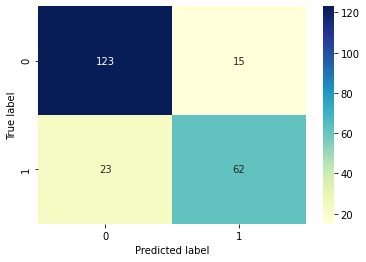

In [919]:
sns.heatmap(pd.DataFrame(s), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [920]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 0.17040358744394618
MSE: 0.17040358744394618
RMSE: 0.41279969409381373


In [921]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_predicted)
acc_score

0.8295964125560538

In [922]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_predicted))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_predicted))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,y_predicted))

----------------------------------------
Accuracy score:
0.8295964125560538
----------------------------------------
Confusion Matrix:
[[123  15]
 [ 23  62]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       138
           1       0.81      0.73      0.77        85

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



# Testing on test.csv

In [923]:
test = pd.read_csv("Raw Dataset/test.csv")

In [924]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [925]:
x_final_test = test[["Sex","SibSp","Parch","Age","Fare"]]

In [926]:
x_final_test.isnull().sum()

Sex       0
SibSp     0
Parch     0
Age      86
Fare      1
dtype: int64

In [927]:
x_final_test["Age"].fillna(value=np.mean(df["Age"]), inplace=True) 

C:\Users\Bhaskar\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [928]:
x_final_test["Fare"].fillna(value= np.mean(df["Fare"]), inplace=True)

In [929]:
x_final_test["Sex"] = sex_encoder.transform(x_final_test["Sex"])

<ipython-input-929-68300d559642>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [930]:
sc = StandardScaler()
x_final_test["Age"] = sc.fit_transform(x_final_test[["Age"]])
sc1 = StandardScaler()
x_final_test["Fare"] = sc1.fit_transform(x_final_test[["Fare"]])

<ipython-input-930-d26af0acc2ce>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-930-d26af0acc2ce>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [931]:
x_final_test.head()

,Sex,SibSp,Parch,Age,Fare
0,1,0,0,0.345202,-0.498253
1,0,1,0,1.335537,-0.513120
2,1,0,0,2.523940,-0.464935
3,1,0,0,-0.249000,-0.483313
4,0,1,1,-0.645134,-0.418318


In [932]:
y_pred = lo.predict(x_final_test)

In [933]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [934]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"], "Survived":y_pred})

In [935]:
submission.to_csv("Dataset/titanic_submission.csv", index=False)

In [936]:
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [937]:
pd.read_csv("Dataset/titanic_submission.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [938]:
original = pd.read_csv("Raw Dataset/gender_submission.csv")

In [939]:
original.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [940]:
accuracy_score(y_pred, original["Survived"])

0.9449760765550239

In [941]:
r2_score(y_pred, original["Survived"])

0.7665428231465967

In [942]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [943]:
def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'supportvectormachine' : {
            'model': SVC(),
            'params': {
                'C': [1.0,2.0,3.0],'kernel':['linear', 'rbf','poly','sigmoid']
            }
        }
    }
   # 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train,y_train)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\v

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\v

,model,best_score,best_params
0,supportvectormachine,0.816418,"{'C': 2.0, 'kernel': 'rbf'}"


# END OF CODE

# ROUGH WORK BELOW

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBRegressor
#from sklearn.linear_model import Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
        
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'C': [1.0,2.0],'max_iter':[2000]
            }
        },
        'randomforestclassifier' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [400],
                'criterion': ['gini','entropy']
            }
        },
        'naive_bayes-BernoulliNB' : {
            'model': BernoulliNB(),
            'params': {
                'alpha': [1.0,2.0]
            }
        },
        'naive_bayes-GaussianNB' : {
            'model': GaussianNB(),
            'params': {
                'priors': [None]
            }
        },
        'KNeighborsClassifier' : {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [1,2,3]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1342, in fit
    X, y = self._validate_data(X, y, accept_sparse='csr', dtype=_dtype,
  File "C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 795, in check_X_y
    X = check_array(

TypeError: float() argument must be a string or a number, not 'StandardScaler'